<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/IA%20y%20ML%20-%20Actividad%20Semana%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Analítica de Negocios**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

### **Actividad Semanas 3 y 4: Modelado, Balanceo e Importancia de Factores**
### Integrantes:
### Carlos López - A00947174
### Leonardo Leal - A0
### Miguel Sanchez - A0
### Ruben Angeles - A0
### Alex - A0


La rotación de personal es uno de los problemas que afecta actualmente a muchas empresas y organizaciones, grandes o pequeñas. En esta actividad usaremos una base de datos generada por IBM para estudiar cómo enfrentar dicho problema.
Deberás descargar el archivo de la siguiente liga de Kaggle, la cual consta de 1470 registros y 35 columnas:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


### **PARTE 1: Análisis descriptivo y preprocesamiento de los datos:**


#### **1) Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem) y en particular de las principales problemáticas que genera.**

El problema de rotación de personal, o employee attrition problem, se refiere a la frecuencia con la que los empleados abandonan sus puestos en una organización. Esto genera varios desafíos:
1. Costos financieros: Contratar y capacitar nuevos empleados es costoso.
2. Disminución de la productividad: La búsqueda y adaptación de nuevos empleados puede reducir la productividad del equipo.
3. Impacto en la moral y el compromiso: La rotación constante puede desmotivar al personal y afectar la cultura de la empresa.
4. Pérdida de conocimiento y experiencia: Cada partida implica la pérdida de habilidades y conocimientos.
5. Dificultades en la retención de talento: La alta rotación dificulta retener a los empleados más talentosos y valiosos.
Por lo que gestionar la rotación de personal es esencial para el éxito a largo plazo de una organización.




#### **2) Carga la base de datos y realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”.**


In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # para un mejor despliegue de los gráficos
sns.set_theme(color_codes=True)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Cargamos la base de datos:

df = pd.read_csv("/content/drive/MyDrive/Actividad Semana 3 - HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
# Como vemos que nuestra variable predictora es Attrition, por lo que necesitamos moverla al final de la base de datos'

# Extraer la columna 'Attrition' (variable objetivo)
attrition_column = df.pop('Attrition')

# Insertar la columna 'Attrition' al final del DataFrame
df['Attrition'] = attrition_column
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [45]:
# Separamos los factores de entrada y la variable de salida:

X = df.drop('Attrition', axis=1)
y = df['Attrition']

**a) Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [52]:
# Dividir los datos en entrenamiento (70%) y temporal (30%) -- Nota: Temporal incluye Validación y Prueba
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.3, random_state= None)

# Dividir el temporal en validación (50%) y prueba (50%)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state= None)

print("Entrenamiento X:", Xtrain.shape,    '%.1f%%' % (100 * Xtrain.shape[0]  / (Xtrain.shape[0] + X_val.shape[0] + Xtest.shape[0] )))
print("Validación X   :", Xval.shape,      '%.1f%%' % (100 * Xval.shape[0]    / (Xtrain.shape[0] + X_val.shape[0] + Xtest.shape[0] )))
print("Prueba X       :", Xtest.shape,     '%.1f%%' % (100 * Xtest.shape[0]   / (Xtrain.shape[0] + X_val.shape[0] + Xtest.shape[0] )))

print("Entrenamiento y:", ytrain.shape,    '%.1f%%' % (100 * ytrain.shape[0]  / (ytrain.shape[0] + yval.shape[0] + ytest.shape[0] )))
print("Validación y   :", yval.shape,      '%.1f%%' % (100 * yval.shape[0]    / (ytrain.shape[0] + yval.shape[0] + ytest.shape[0] )))
print("Prueba y       :", ytest.shape,     '%.1f%%' % (100 * ytest.shape[0]   / (ytrain.shape[0] + yval.shape[0] + ytest.shape[0] )))

Entrenamiento X: (1029, 34) 70.0%
Validación X   : (220, 34) 15.0%
Prueba X       : (221, 34) 15.0%
Entrenamiento y: (1029,) 70.0%
Validación y   : (220,) 15.0%
Prueba y       : (221,) 15.0%


**b) Realiza un análisis inicial de todas las variables y elimina aquellas que no estarán aportando información al problema. Indica cuáles y el porqué de las variables que estás eliminando.**

Buscamos columnas con renglones vacíos

In [29]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

Vemos el tipo de dato para cada columna

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Hacemos un análisis exploratorio de los datos Categóricos

In [34]:
#Seleccionar datos categoricos
df_categoricos = df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]]
df_categoricos.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,No
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,No


In [38]:
#Creamos la lista sin la variable predictora
cat_vars = df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"]]

Creamos graficas de barras para analizar como las diferentes opciones categoricas de cada variable se ven afectadas por Attrition

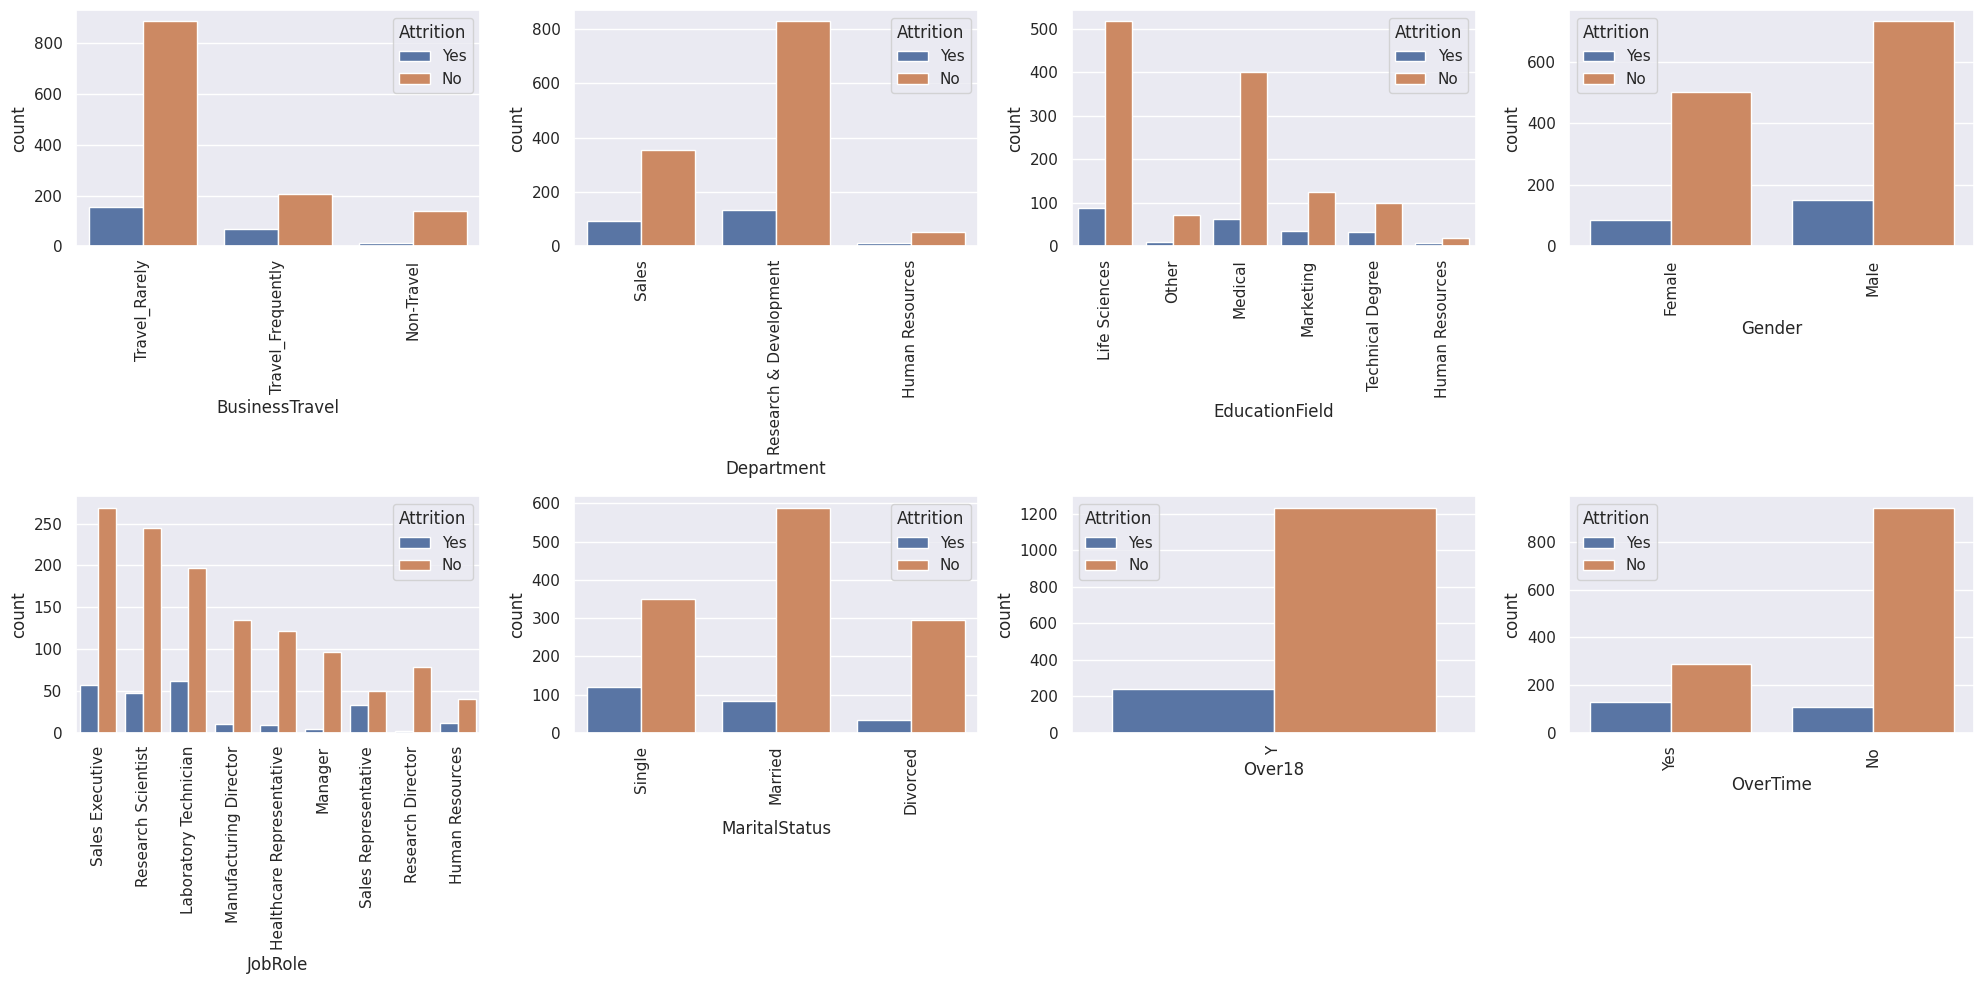

In [39]:
#Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize = (20, 10))
axs = axs.flatten()

#Crear un countplot para cada variable categorica
for i, var in enumerate (cat_vars):
    sns.countplot(x=var, hue="Attrition", data = df_categoricos, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

#Ajustar espacio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()

Creamos histogramas para analizar como las diferentes opciones categoricas de cada variable se ven afectadas por Attrition de un ángulo diferente

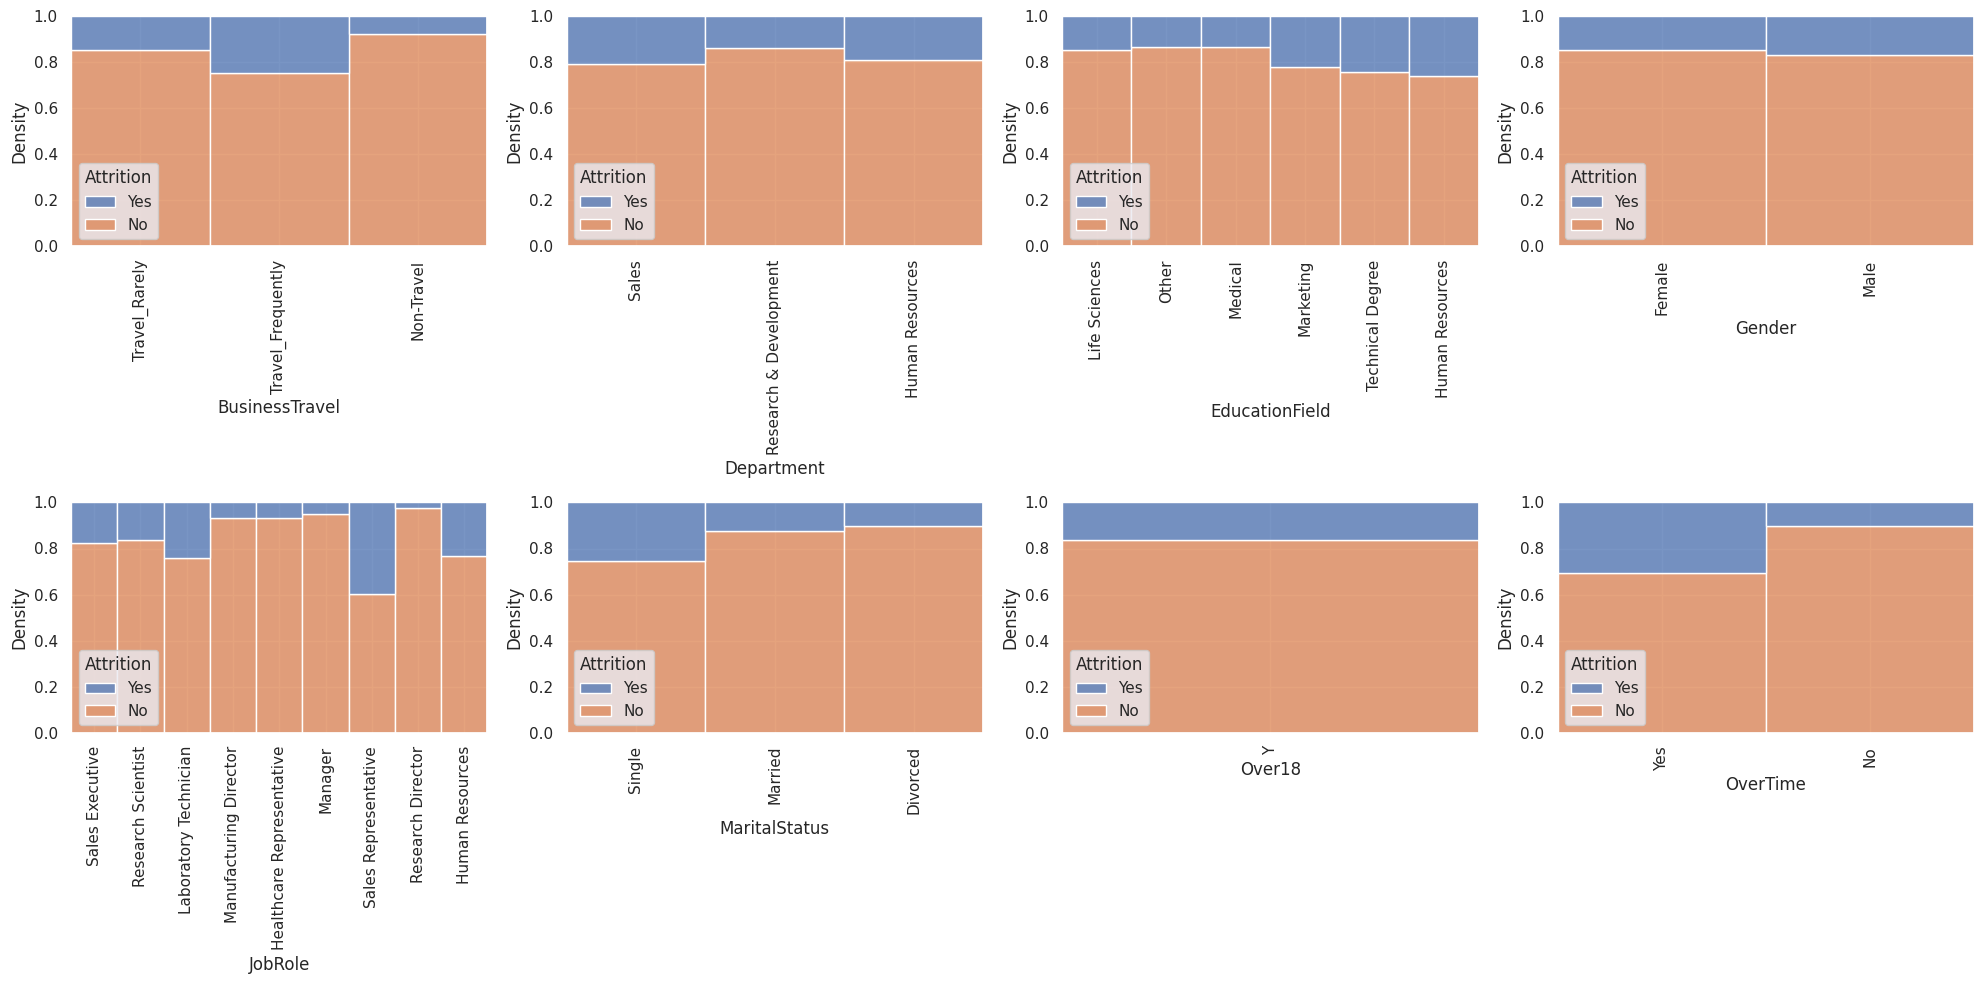

In [41]:
#Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

#Crear histogramas para cada variable categorica
for i, var in enumerate (cat_vars):
    sns.histplot(x=var, hue="Attrition", data = df_categoricos, ax=axs[i], multiple = "fill", kde = False, element = "bars", fill= True, stat = "density")
    axs[i].set_xticklabels(df_categoricos[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

#Ajustar el especio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()


Conclusiones de variables categóricas:

1.   Podemos entender que la columna Over18, no tiene significancia para nuestro analisis y podremos eliminarlo de la base de datos.
2.   prácticamente el Genero también muestra que tanto hombres y mujeres renuncian casi en idéntica proporción, sin embargo la conservaremos para futuros análisis y filtrados.
3.   Se observa que los representantes de ventas son los que más renuncian, seguido de personal de RH y técnicos de laboratorios.
4.   Impresionantemente los Manager y Directores de Investigación son los que menos renuncian, lo que nos da pistas que otros renuncien y no managers muestra una lógica extraña.
5.   También observamos que los solteros son quienes más renuncian y tiene sentido debido a que pueden tomar más riesgos por no tener la misma responsabilidad como los casados y divorciados.
6.   Por otra parte observamos que entre más se viaja más probabilidad tienen de renunciar.

Hacemos un análisis exploratorio de los datos Numéricos

In [35]:
#Seleccionar datos númericos
df_numericos = df[["Age", "DailyRate", "DistanceFromHome", "Education", "EmployeeCount", "EmployeeNumber", "EnvironmentSatisfaction",
                           "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
                           "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel",
                           "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
                           "YearsSinceLastPromotion", "YearsWithCurrManager"]]
df_numericos.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [49]:
num_vars = df[["Age", "DailyRate", "DistanceFromHome", "Education", "EmployeeCount", "EmployeeNumber", "EnvironmentSatisfaction",
                           "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
                           "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel",
                           "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
                           "YearsSinceLastPromotion", "YearsWithCurrManager"]]

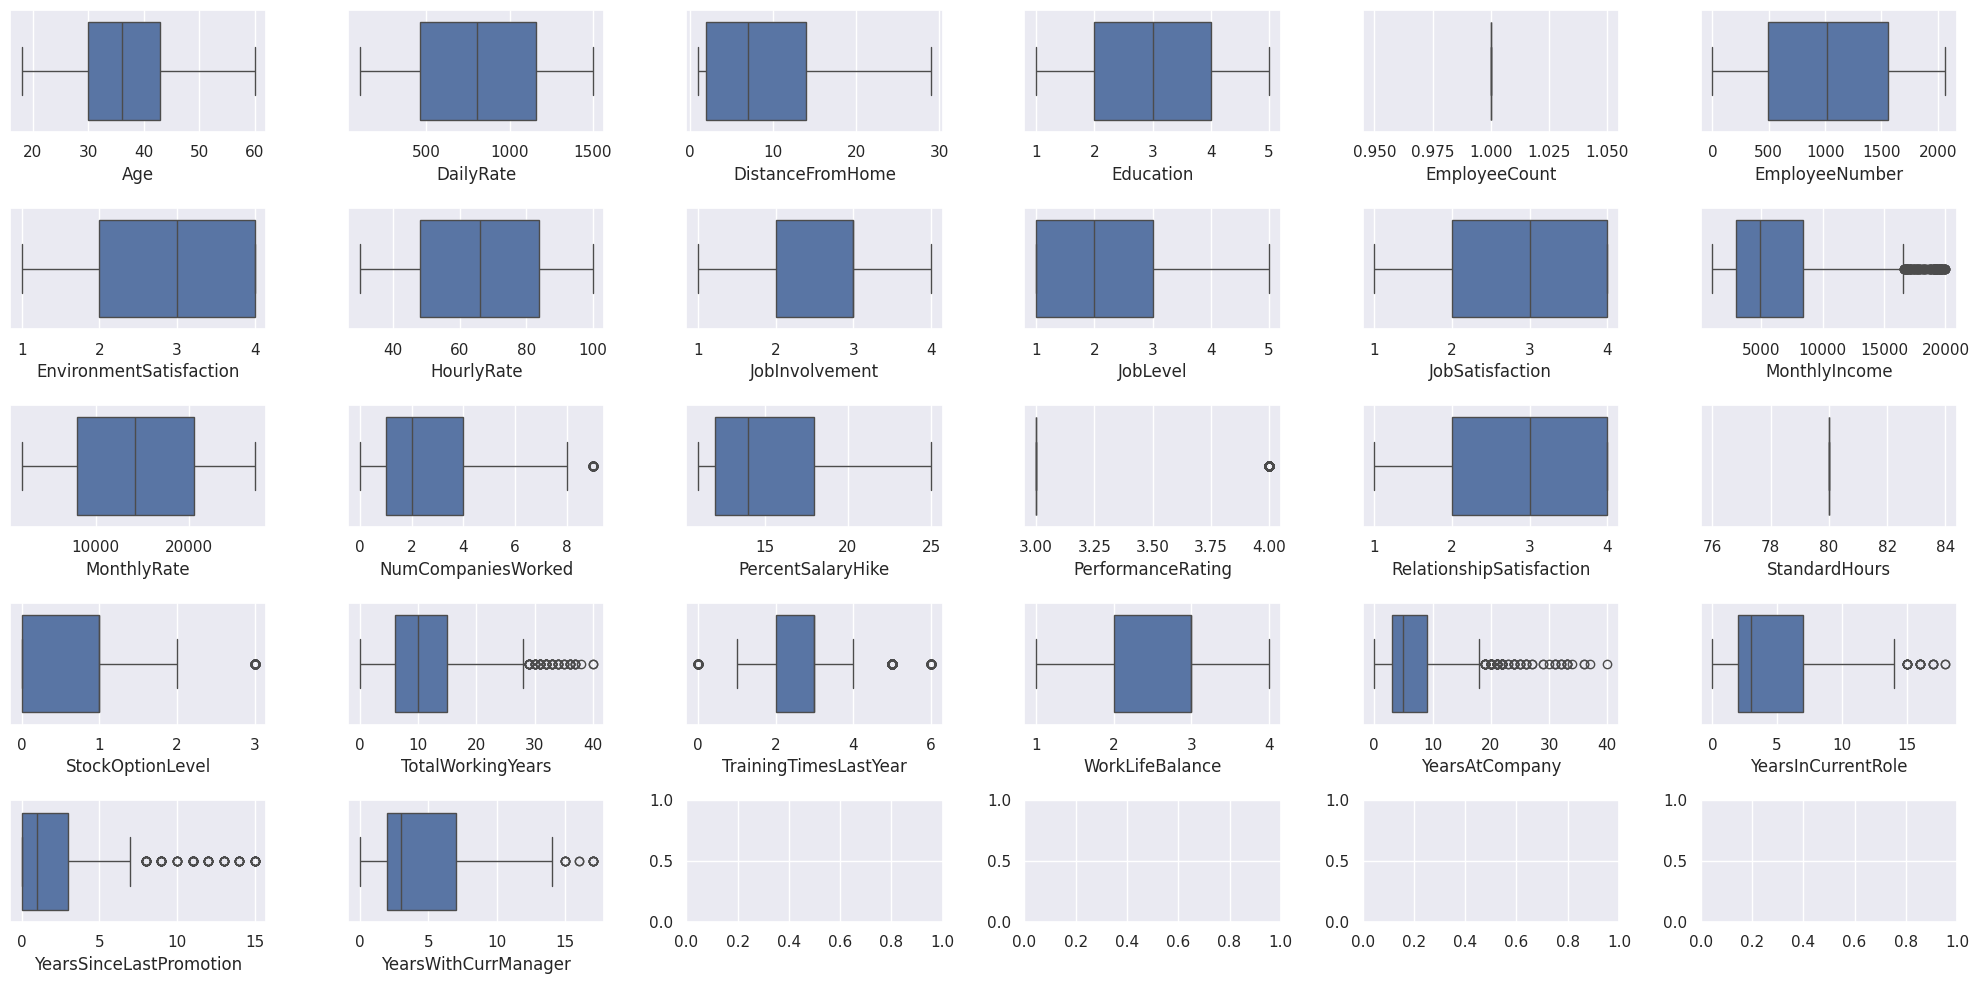

In [51]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

**c) Realiza el análisis que consideres adecuado para los datos de tipo numérico y con base a ello y evitando el filtrado de información (data-leakage), aplica las transformaciones que consideras adecuadas a los tres conjuntos . Indica cuáles fueron estas variables y explica el porqué de las transformaciones que aplicaste, en caso de haber aplicado alguna.**

**d) Realiza el análisis que consideres adecuado para los datos de tipo categórico binario y con base a ello y evitando el filtrado de información, aplica la transformación LabelEncoder() de sklearn a estas variables.**

**e) Realiza el análisis que consideres adecuado para los datos de tipo categórico nominal y con base a ello, aplica la transformación llamada get_dummies() de Pandas a dichas variables. Usa además el argumento “drop_first” para generar “k-1” variables “dummies” a partir de los “k” niveles de cada variable nominal.**

**f) Realiza una inspección de las variables categóricas ordinales y determina qué transformaciones aplicar, en caso de aplicar alguna. Indica cuáles son estas variables y justifica la decisión que tomes.**

### **PARTE 2: Análisis exploratorio entre factores**

#### **3) Se pueden analizar una buena cantidad relaciones entre los factores y la variable de salida “Attrition” (la decisión de dejar un puesto). A manera de ejemplos, obtener solo algunas de estas relaciones gráficas:**


**a) Las variables “Age” y “Attrition”.**

**b) Las variables “Department” y “Attrition”.**

**c) Las variables “Gender” y “Attrition”.**

**d) Incluye alguna otra relación o relaciones que consideres relevantes.**


**e) Con base a los gráficos anteriores ¿qué conclusiones puedes generar para entender mejor el problema?**

*NOTA: Puedes seleccionar el tipo de gráfico que consideres más adecuado, de acuerdo al tipo de variables que estás considerando.*

### **PARTE 3: Modelado**

#### **4) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.**

**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn del mejor modelo obtenido.**

**c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.**

**d) ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.**

**e) Interpreta el valor numérico de la “precisión” de la clase positiva en el contexto del problema de rotación de personal.**

**f) Interpreta el valor numérico del “recall” de la clase positiva en el contexto del problema.**

**g) Con base al contexto de este problema de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.**

#### **5) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función KNeighborsClassifier() de sklearn.**

**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

**c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.**

**d) Interpreta el valor numérico de la “precisión” de la clase positiva.**

**e) Interpreta el valor numérico del “recall” de la clase positiva.**

**f) Compara los resultados con los del modelo de Regresión Logística y escribe tus conclusiones**

### **PARTE 4: Balanceo de Clases**

#### **6) Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los valores de los hiperparámetros que consideres más adecuados para obtener un modelo no sobreentrenado.**

**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

**c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

#### **7) Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.**

**a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

**c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

#### **8) Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye tus conclusiones.**
NOTA: https://imbalanced-learn.org/stable/references/combine.html

### **PARTE 5: La importancia de los factores**

#### **9) Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud de los coeficientes como métrica para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**


**a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).**


**b) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?**

**c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?**

#### **10) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN, aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**


**a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).**


**b) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?**

**c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?**

**d) Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.**

#### **11) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN y de los factores de mayor impacto que encontraste en el inciso anterior, así como de la matriz de correlación, utiliza la clase SelectFromModel de sklearn para reducir la cantidad de factores del problema y volver a entrenar el modelo con estos nuevos datos reducidos, de manera que el desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida previamente con todos los factores. No tienen que ser exactamente iguales ambos resultados en dado caso y cada equipo deberá establecer la diferencia que considere adecuada. Recuerda evitar el filtrado de información del conjunto de entrenamiento a los conjuntos de validación y de prueba.**


**a) ¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.**

**b) Despliega la matriz de confusión y el reporte dado por la función classification_report().**

### **PARTE 6: Modelo final y conclusiones**

#### **12) Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal a partir de los datos históricos iniciales.**


**a) Forma un nuevo conjunto aumentado de Entrenamiento con los mejores conjuntos de entrenamiento y validación que hayas obtenido hasta ahora.**


**b) Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN y entrena el modelo con el nuevo conjunto de entrenamiento aumentado. Utiliza ahora el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo. Para ello:**


**i. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.**

**ii. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**


**iii. Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**

In [ ]:
X, y = make_classification(
       n_samples=2000,          # Se generan "n" registros donde cada factor tiene una distribución gaussiana con varianza 1.
       n_classes=2,             # El conjunto de datos generado constará de dos clases diferentes.
       n_features=2,            # Habrá 2 variables de entrada (factores o variables independientes)
       n_redundant=0,           # No hay factores que sean redundantes, i.e., que uno sea combinación lineal de otros factores.
       n_clusters_per_class=1,  # Cada clase se agrupa alrededor de un único centro.
       weights=[.9, .1],        # [proporción_clase_negativa(0), proporción_clase_positiva(1)]  : p1=1-p0
       flip_y=0.,               # No existen datos mal etiquetados.
       class_sep=0.35,           # Valor que indican la distancia entre clases. Más grande, mayor distancia.
       random_state=0)

Dimensión de datos generados:
Datos de entrada X: (2000, 2)
Variable de salida y: (2000,)


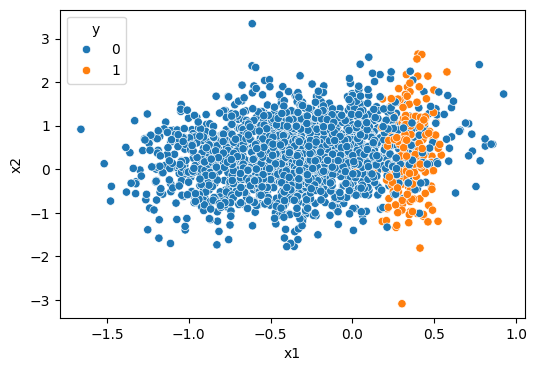

In [ ]:
print('Dimensión de datos generados:')
print('Datos de entrada X:', X.shape)
print('Variable de salida y:', y.shape)

# Los transformamos en un DataFrame de Pandas:
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='x1', y='x2', hue='y');

In [ ]:
X_train, Xvt, y_train, yvt = train_test_split(X, y, train_size=0.60, random_state=1, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)

In [ ]:
# Verificamos el porcentaje de la clase positiva y negativa, generados:
print('Porcentaje de la clase minoritaria: %.2f%%' % (100.*(y_val.sum() / y_val.shape[0])))

Porcentaje de la clase minoritaria: 10.00%


In [ ]:
# Utilizemos el modelo de regresión logística:

modelo = LogisticRegression()

# Entrenamos con los datos de entrenamiento:
modelo.fit(X_train, y_train)

# Veamos el desempeño en cuanto exactitud (accuracy) del modelo con
# los datos de entrenamiento y validación, para verificar si nuestro
# modelo está subentrenado o sobreentrenado:
print('Exactitud del modelo con los datos de entrenamiento: %.1f%%' % (100*modelo.score(X_train,y_train)))
print('Exactitud del modelo con los datos de validación: %.1f%%' % (100*modelo.score(X_val,y_val)))

Exactitud del modelo con los datos de entrenamiento: 90.7%
Exactitud del modelo con los datos de validación: 90.4%


Aunque pareciera que tenemos un buen desempeño y que el modelo no está sobre-entrenado, en realidad el modelo está sub-entrenado. Esto ya que se tiene un porcentaje igual al porcentaje de la clase mayoritaria, que es del 90%.

In [ ]:
# Realizamos las predicciones
y_hat_val = modelo.predict(X_val)

print(confusion_matrix(y_val, y_hat_val))
print(classification_report(y_val, y_hat_val))

[[875  25]
 [ 71  29]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       900
           1       0.54      0.29      0.38       100

    accuracy                           0.90      1000
   macro avg       0.73      0.63      0.66      1000
weighted avg       0.89      0.90      0.89      1000



Aquí observamos cómo los valores de las métricas "precision", "recall" y por lo tanto su promedio armónico "f1-score", son bastante bajos. Lo que nos habla de la poca capacidad de poder predecir correctamente los datos de la clase de interés, la clase positiva.

Veamos si podemos mejorar el modelo con alguna técnica de sub-entrenamiento o sobre-entrenamiento.

Existe una gran variedad de estas técnicas, algunas de las cuales implementaremos de la librería de Imbalanced-learn:

https://imbalanced-learn.org/stable/references/under_sampling.html

https://imbalanced-learn.org/stable/references/over_sampling.html

https://imbalanced-learn.org/stable/references/combine.html

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
bsm = BorderlineSMOTE(sampling_strategy=1.,  # porcentaje de nuvoes datos minoritario-vs-mayoritario
                      random_state=11)

# ajustamos y generamos los datos sobre-muestrados (over-sampling)
# con los datos de entrenamiento:
Xtrain_BSM, ytrain_BSM = bsm.fit_resample(X_train, y_train)

# Entrenamos el modelo con los nuevos datos muestrales de entrenamiento:
modeloRL = LogisticRegression(C=10)
modeloRL.fit(Xtrain_BSM, np.ravel(ytrain_BSM))

print('accuracy-train-balanced', modeloRL.score(Xtrain_BSM, ytrain_BSM))
print('accuracy-val-balanced', modeloRL.score(X_val, y_val))

y_pred_train = modeloRL.predict(Xtrain_BSM)

# Observa que en X_val no se aplica el sobremuestreo,
# para evitar el filtrado de información (data-leakage):
y_pred_val = modeloRL.predict(X_val)

print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

accuracy-train-balanced 0.95
accuracy-val-balanced 0.903
[[803  97]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       900
           1       0.51      1.00      0.67       100

    accuracy                           0.90      1000
   macro avg       0.75      0.95      0.81      1000
weighted avg       0.95      0.90      0.92      1000



Observa que ahora tenemos un Recall=1.00 en la clase positiva, sin embargo la precision bajo al 50%. Además de quedar sobre-entrenado.

Habría que buscar un mejor balance ajustando hiperparámetros del modelo o de la técnica de sobre-muestreo, o bien probar algún otro de los modelos de sub-muestreo y/o sobre-muestreo. Ver los difernentes métodos en las ligas dadas arriba.

# Importancia de los Factores

Existen varias técnicas para evaluar la importancia de los factores en relación al involucramiento que tiene cada factor con la variable de salida.

Veamos algunos de ellos.

### Magnitud de los coeficientes.

Este es una técnica muy simple que debe aplicarse cuando los factores han sido todos escalados de manera equivalente. Sin embargo, debe tomarse con mucha cautela esta técnica, ya que no necesariamente la magnitud por sí misma es indicio de mayor involucramiento en la predicción de la variable de salidad. Esto porque pueden existir relaciones entre combinación de factores que disminuya la importancia de dicho factor. En dado caso siempre intenta algunas de las otras técnicas que estaremos viendo más adelante. Pero como una primera aproximación, puede considerarse aceptable.

In [ ]:
# consideremos los coeficientes obtenidos en el último modelo obtenido:
importance = modeloRL.coef_[0]

# Veamos la magnitud de nuestro modelo, que en este caso es solo de de factores (features):
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 12.49683
Feature: 1, Score: -0.26727


Observamos que definitivamente el factor 0 es el de mayor relevancia para predecir la clase.
Geométricamente tiene sentido, porque si observamos la gráfica obtenida al inicio, el factor 0 está asociado al eje horizontal y por lo tanto, y geométricamente observamos que aproximadamente a la izquierda del valor de 0.25 en el eje horizontal se tiene puntos de la clase mayoritaria y a la derecha los de la clase minoritaria.

Observa que el signo positivo de los coeficientes nos habla sobre la influencia de dicho coeficiente sobre la clase positiva (minoritaria en este caso) y los coeficientes negativos nos hablaría sobre el impacto de estos sobre la clase negativa.

Valores cercanos al cero, como en este caso el factor 1, no tendría mucha influencia sobre el comportamiento de la varible de salida.

# Importancia por Permutación

Veamos ahora esta otra técnica más robusta y que aplica también a otros modelos no lineales y no solamente a los modelos de regresión.

Puedes revisar la documentación para mayor información:

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Usemos nuevamente el modelo de regresión logística previamente entrenado:

results = permutation_importance(modeloRL, X_val, y_val, scoring='recall')

importance = results.importances_mean

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.81800
Feature: 1, Score: 0.00200


Además, la ventaja de este método es que nos permite evaluar el impacto de los factores con respecto a diferentes métricas y no solamente el "accuracy" o exactitud. En particular, para el caso de clases no balanceadas, como en este ejercicio, es mejor considerar métricas como el recall, la precision, o su promedio armónico f1, o el ponderado, f1_weighted.

# Selección de Factores mediante el criterio de la Importancia de los mismos.

Puedes consultar su documentación en la siguiente liga:
    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Con base a los resultados con las técnicas de Importancia de Factores,
# se propone el conjunto de factores que se consideran importantes.
# Para nuestro ejemplo muy sencillo obtuvimos que es solo 2 factor:
max_f = 1

# Indicamos el modelo que se usará para evaluar la importancia de los factores
# y la cantidad de ellos que se desean extraer:
fs = SelectFromModel(estimator=LogisticRegression(), max_features=max_f)
# ajustamos con  los datos de entrenamiento para determinar cuáles se consideran los más relevantes:
fs.fit(X_train, np.ravel(y_train))
# y ahora obtenemos los factores
factor_select = fs.get_support()

print(factor_select)

[ True False]


Obtenemos nuevamente que el primer factor es el más relevante en este caso.

Y seleccionamos entonces solamente los factores o columnas obtenidas en nuestro DataFrame:

In [ ]:
XtrainT_fs = pd.DataFrame(X_train)[pd.DataFrame(X_train).columns[factor_select]]
XvalT_fs = pd.DataFrame(X_val)[pd.DataFrame(X_val).columns[factor_select]]
XtestT_fs = pd.DataFrame(X_test)[pd.DataFrame(X_test).columns[factor_select]]

In [ ]:
XtrainT_fs # y en este caso solo tenemos una columna o factor en nuestro DataFrame.

,0
0,-0.661456
1,-0.131180
2,-0.338835
3,-0.345142
4,-0.254506
...,...
1195,-0.480640
1196,0.048735
1197,-0.017955
1198,-0.326542


In [ ]:
modeloRL = LogisticRegression()
#modeloRL.fit(pd.DataFrame(X_train)[pd.DataFrame(X_train).columns[factor_select]], pd.DataFrame(y_train).values)
modeloRL.fit(XtrainT_fs, np.ravel(pd.DataFrame(y_train)))

# evaluate the model
#ytrainhat = model.predict(Xtrain_fs)
#yvalhat = model.predict(Xval_fs)
#ytesthat = model.predict(Xtest_fs)

# evaluate predictions
R2train = modeloRL.score(XtrainT_fs, np.ravel(y_train))
R2val = modeloRL.score(XvalT_fs, np.ravel(y_val))
R2test = modeloRL.score(XtestT_fs, np.ravel(y_test))

print('R2-Train: %.2f' % (R2train*100))
print('R2-Val: %.2f' % (R2val*100))
print('R2-Test: %.2f' % (R2test*100))

R2-Train: 90.08
R2-Val: 89.80
R2-Test: 89.70


Estos nuevos DataFrame los usaríamos para entrenar un nuevo modelo, con esta reducción de dimensionalidad.

### **>> Fin del ejemplo de esta semana <<**